In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
data= pd.read_csv('customer_segmentation.csv')

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
#Supprimons les colonnes contenant les variable manquantes dans notre variable income
data= data.dropna(subset=['Income'])

In [9]:
#Calculons les ages des clients
annee_actuelle= datetime.now().year
data['Age'] = annee_actuelle - data['Year_Birth']

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44


In [10]:
#Supprimons les colonnes inutiles
columns_to_drop = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer',
    'Z_CostContact', 'Z_Revenue', 'Complain', 'Response',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]

data = data.drop(columns=columns_to_drop, errors='ignore')


 

In [11]:
# Matrice de clustering
X = data.copy()

print("✅ Données prêtes pour normalisation :")
print(X.head())

✅ Données prêtes pour normalisation :
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  N

In [12]:
#Normalisons les données
scaler= StandardScaler()

X_scaler= scaler.fit_transform(data)



#On reconvertir en dataframe
X_scaler= pd.DataFrame(X_scaler, columns= data.columns)
X_scaler.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420


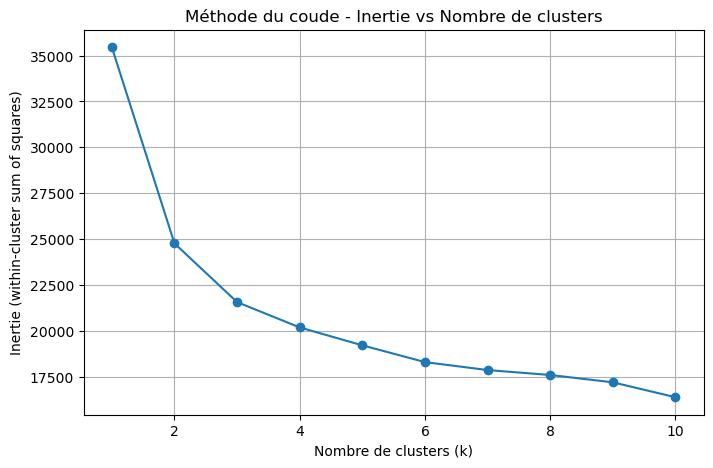

In [13]:
# Tester différents nombres de clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaler)
    inertia.append(kmeans.inertia_)

# Visualiser la courbe
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode du coude - Inertie vs Nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [14]:
#On applique notre cluster avec 4 groupe
kmeans=KMeans(n_clusters= 4, random_state=42)
kmeans.fit(X_scaler)


KMeans(n_clusters=4, random_state=42)

In [15]:
X_scaler['Cluster']= kmeans.labels_

X_scaler.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Cluster
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,1
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,2
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,1
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,0
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,0


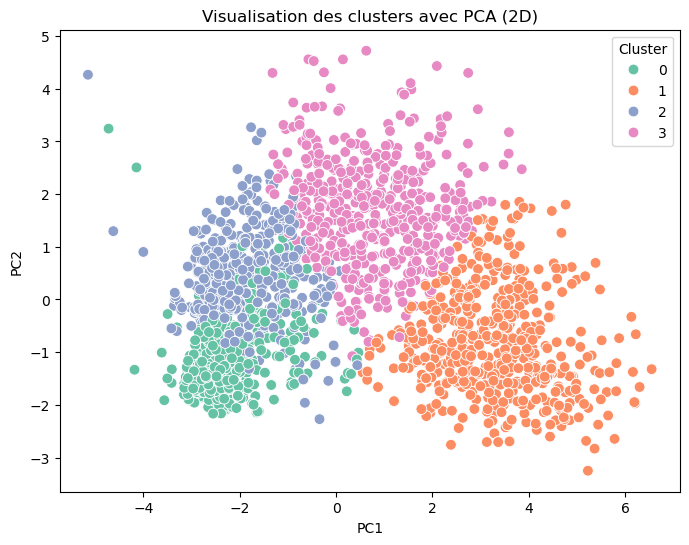

In [16]:
 # Réduction à 2 dimensions
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaler.drop(columns=['Cluster']))

# DataFrame avec les clusters et composantes
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_scaler['Cluster']

# Affichage
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisation des clusters avec PCA (2D)')
plt.savefig('Visualisation des clusters avec PCA', dpi=300 )
plt.show()

**DBSCAN**

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan= DBSCAN (eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaler)

X_scaler['DBSCAN_cluster']= labels

#Comptons les points 
print("Distribution des clusters DBSCAN :")
print(pd.Series(labels).value_counts().sort_index())

Distribution des clusters DBSCAN :
-1    1367
 0     262
 1     396
 2      25
 3      31
 4     104
 5      10
 6       5
 7       5
 8       8
 9       3
Name: count, dtype: int64


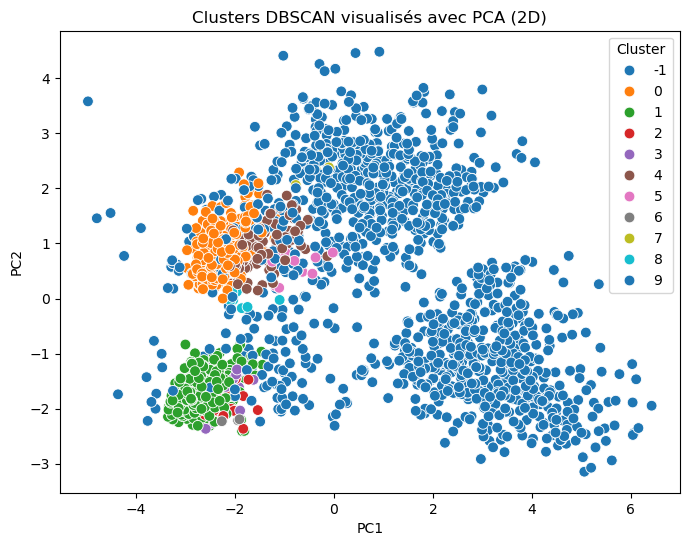

In [19]:
# PCA sur les données sans la colonne des clusters DBSCAN
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaler.drop(columns=['DBSCAN_cluster']))

# Création du DataFrame
pca_dbscan = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_dbscan['Cluster'] = X_scaler['DBSCAN_cluster']

# Affichage
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_dbscan, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title("Clusters DBSCAN visualisés avec PCA (2D)")
plt.legend(title='Cluster')
plt.savefig('Clusters DBSCAN visualisés avec PCA (2D)', dpi=300 )
plt.show()

**OPTICS**

In [21]:
from sklearn.cluster import OPTICS
#Creations du moele
optics= OPTICS(min_samples=5, xi= 0.05, min_cluster_size=0.05)

#Entrainement
optics.fit(X_scaler.drop(columns=['DBSCAN_cluster']))

labels_optics= optics.labels_

X_scaler['Optics_cluster']=labels_optics
print(pd.Series(labels_optics).value_counts().sort_index())from sklearn.cluster import OPTICS

SyntaxError: invalid syntax (2524168957.py, line 11)

In [ ]:
# PCA des données sans la colonne OPTICS
components = pca.fit_transform(X_scaler.drop(columns=['DBSCAN_cluster', 'Optics_cluster']))

# Création DataFrame pour le plot
pca_optics = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_optics['Cluster'] = X_scaler['Optics_cluster']

# Visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_optics, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title("Clusters OPTICS visualisés avec PCA (2D)")
plt.legend(title='Cluster')
plt.savefig('Clusters OPTICS visualisés avec PCA (2D)', dpi=300 )
plt.show()


**Clustering Incremental**

In [22]:
from sklearn.cluster import MiniBatchKMeans

In [24]:
#Initialisation du modele
model_incremental= MiniBatchKMeans(n_clusters=4, batch_size= 100, random_state=42)

In [26]:
#on cree nos petit flux de données

batch_size= 100
batches= [X_scaler[i:i+ batch_size] for i in range (0, len(X_scaler), batch_size)]

In [30]:
#On fait passer nos petit flux de données au model pour l'apprentisage
for i, batch in enumerate(batches):
    model_incremental.partial_fit(batch)
    print(f"✅ Mini-batch {i+1} traité")

✅ Mini-batch 1 traité
✅ Mini-batch 2 traité
✅ Mini-batch 3 traité
✅ Mini-batch 4 traité
✅ Mini-batch 5 traité
✅ Mini-batch 6 traité
✅ Mini-batch 7 traité
✅ Mini-batch 8 traité
✅ Mini-batch 9 traité
✅ Mini-batch 10 traité
✅ Mini-batch 11 traité
✅ Mini-batch 12 traité
✅ Mini-batch 13 traité
✅ Mini-batch 14 traité
✅ Mini-batch 15 traité
✅ Mini-batch 16 traité
✅ Mini-batch 17 traité
✅ Mini-batch 18 traité
✅ Mini-batch 19 traité
✅ Mini-batch 20 traité
✅ Mini-batch 21 traité
✅ Mini-batch 22 traité
✅ Mini-batch 23 traité


In [32]:
X_scaler['Cluster_incrermental']= model_incremental.predict(X_scaler)

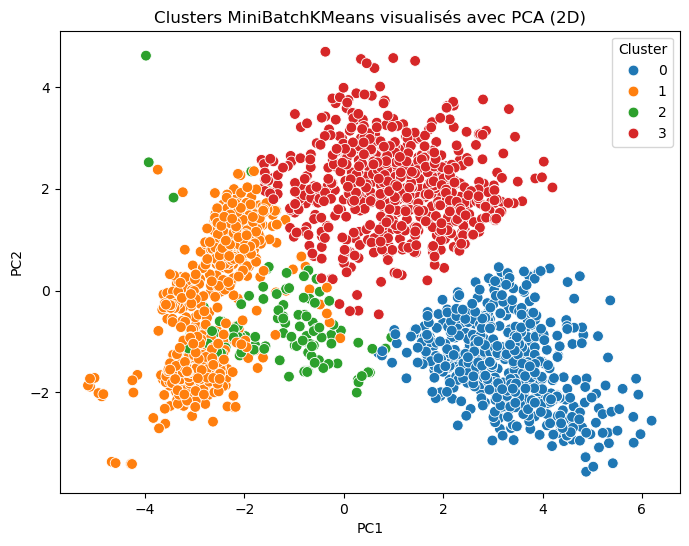

In [34]:
# PCA sur les données sans la colonne des clusters DBSCAN
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaler.drop(columns=['Cluster_incrermental']))

# Création du DataFrame
pca_dbscan = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_dbscan['Cluster'] = X_scaler['Cluster_incrermental']

# Affichage
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_dbscan, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title("Clusters MiniBatchKMeans visualisés avec PCA (2D)")
plt.legend(title='Cluster')
plt.savefig('Clusters MiniBatchKMeans avec PCA (2D)', dpi=300 )
plt.show()